In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#执行第一步，连接谷歌云盘

Mounted at /content/drive


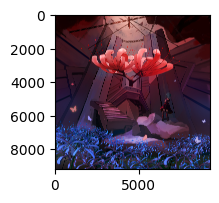

In [3]:
I = mpimg.imread('/content/drive/MyDrive/python 研究/6彼岸开绽2 .jpg')
plt.figure(figsize=(2,2))
plt.imshow(I)
#检查是否连上了谷歌云

# 从云盘中构建图

In [10]:
df = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/昆明线路节点链接关系.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/昆明线路节点属性.csv')

In [11]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [12]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    attr4 = row['800M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3
        G.nodes[node]['800M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

In [13]:
#查看节点的属性
for node, attrs in G.nodes.data():
    print("Node:", node)
    print("Attributes:", attrs)
    print()

Node: 西北部公交枢纽站
Attributes: {'区域属性': '五华区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 公交西路修理公司(普吉路)
Attributes: {'区域属性': '五华区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 普吉路中段
Attributes: {'区域属性': '五华区', '线路': 'C68路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 王家桥(普吉路)
Attributes: {'区域属性': '五华区', '线路': 'C68路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 观音寺社区
Attributes: {'区域属性': '五华区', '线路': 'C68路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 交通学校
Attributes: {'区域属性': '五华区', '线路': 'C68路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 普吉路南口
Attributes: {'区域属性': '五华区', '线路': 'C68路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 金鼎园
Attributes: {'区域属性': '五华区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 1.0, '800M内文保单位/古迹遗址/宗祠故地的个数': 1.0}

Node: 虹山新村
Attributes: {'区域属性': '五华区', '线路': '1路', '500M内文保

In [14]:
#查看边属性
for u, v, attr in G.edges(data=True):
    print(f"边 ({u}, {v}) 的属性:")
    for key, value in attr.items():
        print(f"{key}: {value}")
    print()

边 (西北部公交枢纽站, 公交西路修理公司(普吉路)) 的属性:
attribute: 1路

边 (公交西路修理公司(普吉路), 普吉路中段) 的属性:
attribute: 1路

边 (普吉路中段, 王家桥(普吉路)) 的属性:
attribute: 1路

边 (普吉路中段, 王家桥(普吉路)) 的属性:
attribute: K2路

边 (普吉路中段, 王家桥(普吉路)) 的属性:
attribute: C68路

边 (普吉路中段, 小屯路口(陈家营路)) 的属性:
attribute: K2路

边 (普吉路中段, 公交西部修理公司(普吉路)) 的属性:
attribute: C68路

边 (王家桥(普吉路), 观音寺社区) 的属性:
attribute: 1路

边 (王家桥(普吉路), 观音寺社区) 的属性:
attribute: K2路

边 (王家桥(普吉路), 观音寺社区) 的属性:
attribute: C68路

边 (观音寺社区, 交通学校) 的属性:
attribute: 1路

边 (观音寺社区, 交通学校) 的属性:
attribute: K2路

边 (观音寺社区, 交通学校) 的属性:
attribute: C68路

边 (交通学校, 普吉路南口) 的属性:
attribute: 1路

边 (交通学校, 普吉路南口) 的属性:
attribute: C68路

边 (交通学校, 吉普路南口) 的属性:
attribute: K2路

边 (普吉路南口, 金鼎园) 的属性:
attribute: 1路

边 (普吉路南口, 黄土坡后街) 的属性:
attribute: C68路

边 (金鼎园, 虹山新村) 的属性:
attribute: 1路

边 (虹山新村, 阳光果香小区（学府路）) 的属性:
attribute: 1路

边 (阳光果香小区（学府路）, 冶金学校) 的属性:
attribute: 1路

边 (冶金学校, 苏家塘) 的属性:
attribute: 1路

边 (冶金学校, 苏家塘) 的属性:
attribute: 98路

边 (冶金学校, 景秀庄园小区(虹山东路)) 的属性:
attribute: 98路

边 (苏家塘, 理工大学西门(建设路)) 的属性:
attribute: 1路

边 (

In [15]:
# 获取图G的节点数量
num_nodes = G.number_of_nodes()

print("图G的节点数量为:", num_nodes)

图G的节点数量为: 439


# 获取领接矩阵

In [16]:
# 获取邻接矩阵
adj_matrix = nx.adjacency_matrix(G)
# 将邻接矩阵转换为NumPy数组
adj_array = adj_matrix.toarray()

#打印邻接矩阵
print(adj_array)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


In [17]:
#获取节点编号列表
node_ids = list(G.nodes())

# 构建邻接矩阵
adj_matrix = nx.adjacency_matrix(G, nodelist=node_ids)

# 将邻接矩阵转换为DataFrame
df1 = pd.DataFrame(adj_matrix.toarray(), index=node_ids, columns=node_ids)

# 保存DataFrame到CSV文件
#df1.to_csv('/content/drive/MyDrive/python 研究/XXXXX', index=True, header=True)

In [18]:
print(len(list(G.nodes())))
list(G.nodes())[14]

439


'建设路'

# 获取节点属性（权重）

In [19]:
node_attributes = G.nodes.data()
target_attribute = '500M内文保单位/古迹遗址/宗祠故地的个数'
attribute=[]


target_attribute_2 = '800M内文保单位/古迹遗址/宗祠故地的个数'
attribute_2=[]

In [20]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute in attributes:
        attribute_value = attributes[target_attribute]

        attribute.append(attribute_value)
    else:
        attribute.append(-1)

    print("节点:", node)
    print("属性:", target_attribute, "=", attribute_value)
    print()

节点: 西北部公交枢纽站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 公交西路修理公司(普吉路)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 普吉路中段
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 王家桥(普吉路)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 观音寺社区
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 交通学校
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 普吉路南口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 金鼎园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 虹山新村
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 阳光果香小区（学府路）
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 冶金学校
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 苏家塘
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 理工大学西门(建设路)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 地台寺
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 建设路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 府甬道
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 9.0

节点: 云南大学(翠湖北路)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 9.0

节点: 青云街
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 12.0

节点: 华山西路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 15.0

节点: 华山西路地铁站D口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 15.0

节点: 财盛巷口(人民中路)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 17.0

节点: 南太桥(青年路)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节

In [21]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute_2 in attributes:
        attribute_value = attributes[target_attribute_2]

        attribute_2.append(attribute_value)
    else:
        attribute_2.append(-1)

    print("节点:", node)
    print("属性:", target_attribute_2, "=", attribute_value)
    print()

节点: 西北部公交枢纽站
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 公交西路修理公司(普吉路)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 普吉路中段
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 王家桥(普吉路)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 观音寺社区
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 交通学校
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 普吉路南口
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 金鼎园
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 虹山新村
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 阳光果香小区（学府路）
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 冶金学校
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 苏家塘
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 理工大学西门(建设路)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 地台寺
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 建设路
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 15.0

节点: 府甬道
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 17.0

节点: 云南大学(翠湖北路)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 23.0

节点: 青云街
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 35.0

节点: 华山西路
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 32.0

节点: 华山西路地铁站D口
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 32.0

节点: 财盛巷口(人民中路)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 28.0

节点: 南太桥(青年路)
属性: 800M内文保单位/古迹遗址/宗祠故地的个数 = 10.

In [22]:
#获取权重
attribute=np.array(attribute)
print(attribute.shape)

#获取权重
attribute_2=np.array(attribute_2)
print(attribute_2.shape)

(439,)
(439,)


In [23]:
#打印权重
print(attribute)
print(attribute_2)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  4.  4.  9.  9. 12.
 15. 15. 17.  6.  4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  3.  4.
 17.  4.  4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  6.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  6.  6.  7.  4.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  6.  4.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  2.  0.
  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  1.  2.  0.  0.  1.  1.  2.  1.
  1.  1.  2.  1.  0. 12.  0.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  7.  4.  3.  1.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  9. 10.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  2.  0. 12. 11.  9.  0.  0.  0.  2.  2.  2.
  1.  1.  0.  0.  0.  0.  0.  0.  6.  3.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  4.  0.  0.  0.  0.  0

# 将图的边转换为edge_index

In [24]:
 #获取图的边列表
edge_list = list(G.edges())

# 将边列表转换为 edge_index
edge_index = np.array(edge_list).T

# 打印结果
edge_index= np.array(edge_index)
edge_index

array([['西北部公交枢纽站', '公交西路修理公司(普吉路)', '普吉路中段', ..., '民航路口(环城南路)',
        '吴井桥(环城南路)', '苏家塘路'],
       ['公交西路修理公司(普吉路)', '普吉路中段', '王家桥(普吉路)', ..., '吴井桥(环城南路)', '双龙商场',
        '景秀庄园小区(虹山东路)']], dtype='<U15')

In [25]:
#查看边的数量
edge_index.shape

(2, 611)

**提取纯数字的edge_index**

In [26]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G2 = nx.convert_node_labels_to_integers(G)
# 获取图的边列表
edge_list_number = list(G2.edges())
# 将边列表转换为 edge_index
edge_index_number = np.array(edge_list_number).T

# 打印结果
edge_index_number= np.array(edge_index_number)
print(edge_index_number)
print(edge_index_number.shape)

#shape 格式与上方一致即可进行下一步

[[  0   1   2 ... 434 435 437]
 [  1   2   3 ... 435 436 438]]
(2, 611)


**创建节点映射字典**

In [27]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G_int_labels = nx.convert_node_labels_to_integers(G)

In [28]:
#dir(G_int_labels)   #查看G_int_labels 支持的后缀
G_int_labels.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [29]:
list1=G_int_labels.nodes
list1=np.array(list1)
list1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
list_1=G.nodes.data()
list_1=np.array(list_1)
print(list_1[3][0])

list_2=list_1
list2 = []  # 创建一个空列表，用于存储遍历结果

for item in list_2:
    list2.append(item[0])

list2=np.array(list2)

#list2#此处可以查看list2

王家桥(普吉路)


In [31]:
list1 = list1
list2 = list2
mapping_dict = { }  # 创建一个空字典

for i in range(len(list1)):
    key = str(list1[i])  # 将整数转换为字符串作为键
    value = list2[i]  # 节点名称作为值
    mapping_dict[key] = value

In [32]:
mapping_dict["162"]

'丹霞路口(西园路)'

# 统计已有信息

**邻接矩阵**

In [33]:
#邻接矩阵
print(adj_array)
print(adj_array.shape)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(439, 439)


**500M内古迹数量**

In [34]:
#500m内古迹的数量，作为权重
print(attribute)
print(attribute.shape)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  4.  4.  9.  9. 12.
 15. 15. 17.  6.  4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  3.  4.
 17.  4.  4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  6.  2.  0.  2.  0.
  0.  0.  0.  0.  0.  0.  0.  6.  6.  7.  4.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  6.  4.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  2.  0.
  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  1.  2.  0.  0.  1.  1.  2.  1.
  1.  1.  2.  1.  0. 12.  0.  3.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  7.  4.  3.  1.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  9. 10.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  2.  0. 12. 11.  9.  0.  0.  0.  2.  2.  2.
  1.  1.  0.  0.  0.  0.  0.  0.  6.  3.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  4.  0.  0.  0.  0.  0

**800M内古迹数量**

In [35]:
#500m内古迹的数量，作为权重
print(attribute_2)
print(attribute_2.shape)

[ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  4.  4. 15. 17. 23. 35.
 32. 32. 28. 10. 10. 10.  3.  1.  1.  0.  0.  0.  0.  0.  4.  4.  7.  6.
 28. 25. 10.  0.  0.  0.  1.  0.  0.  0.  0.  2.  3. 20.  7.  2.  5.  0.
  0.  0.  0.  0.  0.  0.  2. 10. 10. 11. 12.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  4.  4. 10. 18.  5.  4.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.
  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  2.  1.  1.  1.  0.  4.  0.
  1.  0.  1.  1.  0.  0.  1.  1.  2.  1.  2.  2.  1.  0.  1.  2.  2.  2.
  3.  2.  2.  1.  2. 25.  4. 15.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  0.  0.  0. 10.  8.  6.  3.  1.  0.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. 18. 17.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  2.  0. 25. 18. 19.  0.  0.  0.  2.  2.  3.
  1.  1.  0.  0.  0.  0.  0.  0. 10. 15.  1.  0.  0.  0.  1.  1.  1.  0.
  0.  1.  1.  0.  0.  0.  7.  9.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0. 12. 12.  0.  0.  0.  0.  0

In [36]:
#检查权重是否都大于等于0，如果不是，那么权重矩阵有问题。
arr = attribute_2

if (arr >= 0).all():
  print('True')
else:
  print('False')

True


**拼接邻接矩阵和古迹数量矩阵**

In [37]:
attribute_combined=np.concatenate((adj_array, attribute.reshape(-1,1)), axis=1)
attribute_combined_1=np.concatenate((attribute_combined, attribute_2.reshape(-1,1)), axis=1)
print(attribute_combined_1.shape)

(439, 441)


**参考标签制作，此处需要将古迹数量的节点进行归类，可以选择3类4类都可以**

In [38]:
#此处需要将古迹数量的节点进行归类，可以选择3类4类都可以，这个归类会影响最终结果。这是计算机在向你询问边界是什么样子的。
#注意调整range的值，针对昆明，因为有两个层级的数据，可以考虑加权求和。
attribute_label=[]
for i in range(439):
  if (attribute[i]*1.0+(attribute_2[i]-attribute[i])*0.2)<3 :
    attribute_label.append(0)
  elif (attribute[i]*1.0+(attribute_2[i]-attribute[i])*0.2)<=8:
    attribute_label.append(1)
  else:
    attribute_label.append(2)


attribute_label=np.array(attribute_label)
attribute_label.shape

(439,)

**点和点的链接关系**

In [39]:
#点和点的连接关系，另一种表现形式,从边的角度考虑
print(edge_index)
print(edge_index.shape)

[['西北部公交枢纽站' '公交西路修理公司(普吉路)' '普吉路中段' ... '民航路口(环城南路)' '吴井桥(环城南路)' '苏家塘路']
 ['公交西路修理公司(普吉路)' '普吉路中段' '王家桥(普吉路)' ... '吴井桥(环城南路)' '双龙商场'
  '景秀庄园小区(虹山东路)']]
(2, 611)


In [40]:
print(edge_index_number)
print(edge_index_number.shape)

[[  0   1   2 ... 434 435 437]
 [  1   2   3 ... 435 436 438]]
(2, 611)


**节点和数字间的映射关系**

In [41]:
#节点和数字间的映射关系

print(mapping_dict)
print(len(mapping_dict))

{'0': '西北部公交枢纽站', '1': '公交西路修理公司(普吉路)', '2': '普吉路中段', '3': '王家桥(普吉路)', '4': '观音寺社区', '5': '交通学校', '6': '普吉路南口', '7': '金鼎园', '8': '虹山新村', '9': '阳光果香小区（学府路）', '10': '冶金学校', '11': '苏家塘', '12': '理工大学西门(建设路)', '13': '地台寺', '14': '建设路', '15': '府甬道', '16': '云南大学(翠湖北路)', '17': '青云街', '18': '华山西路', '19': '华山西路地铁站D口', '20': '财盛巷口(人民中路)', '21': '南太桥(青年路)', '22': '得胜桥(青年路)', '23': '塘子巷(拓东路)', '24': '拓东路中段', '25': '市博物馆', '26': '岔街(拓东路)', '27': '东站(环城南路)', '28': '昆明站(永平路)', '29': '昆明站(站前路)', '30': '永安路口(北京路)', '31': '环城南路口(北京路)', '32': '和平村(北京路)', '33': '塘子巷(北京路)', '34': '东风广场(北京路)', '35': '交三桥(人民东路)', '36': '文庙(人民中路)', '37': '富春街口(人民中路)', '38': '百汇商场', '39': '西站', '40': '虹山南路口(滇缅大道)', '41': '麻园(滇缅大道)', '42': '黄土坡', '43': '颐园小区(白云路)', '44': '白云路口(北京路)', '45': '凤凰新村', '46': '火车北站(北京路)', '47': '穿心鼓楼(北京路)', '48': '凤凰村', '49': '金马坊', '50': '靖国路口', '51': '弥勒寺(西昌路)', '52': '工人新村(西昌路)', '53': '西岳庙(海埂路)', '54': '豆腐营(海埂路)', '55': '洒金巷口(海埂路)', '56': '绿荫大道路口', '57': '日新路口(润城第二大道)', '58': '前卫营(前兴路)', '59': '前兴

In [42]:
#节点和数字间的映射关系(翻转)
reversed_dict = {value: key for key, value in mapping_dict.items()}
print(reversed_dict)

{'西北部公交枢纽站': '0', '公交西路修理公司(普吉路)': '1', '普吉路中段': '2', '王家桥(普吉路)': '3', '观音寺社区': '4', '交通学校': '5', '普吉路南口': '6', '金鼎园': '7', '虹山新村': '8', '阳光果香小区（学府路）': '9', '冶金学校': '10', '苏家塘': '11', '理工大学西门(建设路)': '12', '地台寺': '13', '建设路': '14', '府甬道': '15', '云南大学(翠湖北路)': '16', '青云街': '17', '华山西路': '18', '华山西路地铁站D口': '19', '财盛巷口(人民中路)': '20', '南太桥(青年路)': '21', '得胜桥(青年路)': '22', '塘子巷(拓东路)': '23', '拓东路中段': '24', '市博物馆': '25', '岔街(拓东路)': '26', '东站(环城南路)': '27', '昆明站(永平路)': '28', '昆明站(站前路)': '29', '永安路口(北京路)': '30', '环城南路口(北京路)': '31', '和平村(北京路)': '32', '塘子巷(北京路)': '33', '东风广场(北京路)': '34', '交三桥(人民东路)': '35', '文庙(人民中路)': '36', '富春街口(人民中路)': '37', '百汇商场': '38', '西站': '39', '虹山南路口(滇缅大道)': '40', '麻园(滇缅大道)': '41', '黄土坡': '42', '颐园小区(白云路)': '43', '白云路口(北京路)': '44', '凤凰新村': '45', '火车北站(北京路)': '46', '穿心鼓楼(北京路)': '47', '凤凰村': '48', '金马坊': '49', '靖国路口': '50', '弥勒寺(西昌路)': '51', '工人新村(西昌路)': '52', '西岳庙(海埂路)': '53', '豆腐营(海埂路)': '54', '洒金巷口(海埂路)': '55', '绿荫大道路口': '56', '日新路口(润城第二大道)': '57', '前卫营(前兴路)': '58', '前兴路公交枢纽站

**掩码的的制作**

In [43]:
total_nodes = len(attribute_label)#此处相比福州作了改进，我们直接用古迹数量权重列表的长度作为节点总数量
num_false = 180

mask_1 = np.array([False] * num_false + [True] * (total_nodes - num_false))
np.random.shuffle(mask_1)

In [44]:
print(mask_1)
print(mask_1.shape)

[ True False  True  True False  True  True  True False  True False False
 False  True  True  True  True False  True False  True False  True  True
 False False False False False  True False False False  True  True  True
 False  True  True  True  True False  True False False  True  True  True
  True  True  True  True False False  True  True  True  True False  True
  True  True False  True False False False  True  True False  True  True
  True  True  True False  True  True  True False False False False  True
 False  True  True False  True  True  True  True  True  True False  True
  True  True  True  True False False False False  True False  True False
  True  True  True False  True  True  True False False False  True  True
  True  True  True False False  True  True False  True  True  True False
  True False False False  True  True False False False  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True Fa

# 分支探索：图自编码器

In [46]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00


In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [77]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [90]:
# 假设 data.b 是初始特征矩阵，data.inde_edge 是边列表
# 请确保 data.b 和 data.inde_edge 已定义并正确地导入
node_features = torch.tensor(attribute_combined_1, dtype=torch.float32)  # 确保数据类型是 float32
edge_index = torch.tensor(adj_matrix.nonzero(), dtype=torch.long)  # 边列表通常是 long 类型

In [91]:
# 创建 PyTorch Geometric 的数据对象
graph_data = Data(x=node_features, edge_index=edge_index)

**定义图自编码器**

In [119]:
class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphAutoencoder, self).__init__()
        # 编码器部分
        self.encoder = GCNConv(input_dim, hidden_dim)
        self.hidden_layer = GCNConv(hidden_dim, hidden_dim)
        self.z_layer = GCNConv(hidden_dim, output_dim)

    def encode(self, x, edge_index):
        x = self.encoder(x, edge_index)
        x = F.relu(x)
        x = self.hidden_layer(x, edge_index)
        x = F.relu(x)
        z = self.z_layer(x, edge_index)
        return z

    def decode(self, z, edge_index):
        # 使用内积解码边缘信息
        return torch.sigmoid((z[edge_index[0]] * z[edge_index[1]]).sum(dim=1))

    def forward(self, x, edge_index):
        z = self.encode(x, edge_index)
        reconstructed_edges = self.decode(z, edge_index)
        return z, reconstructed_edges

# 定义模型、损失函数和优化器
input_dim = node_features.shape[1]  # 411
hidden_dim = 12  # 可以自行调整
output_dim = 3  # 目标嵌入维度

model = GraphAutoencoder(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()  # 使用二元交叉熵损失函数进行链接重建


In [105]:
# 训练过程
def train_model():  # 确保使用正确的函数名称
    model.train()
    optimizer.zero_grad()
    z, reconstructed_edges = model(graph_data.x, graph_data.edge_index)
    # 使用边连接来计算重构损失
    loss = criterion(reconstructed_edges, torch.ones(edge_index.size(1), dtype=torch.float32))
    loss.backward()
    optimizer.step()
    return loss.item()

In [120]:
# 训练模型
num_epochs = 200  # 可以根据需要调整
for epoch in range(num_epochs):
    loss = train_model()  # 确保调用正确的训练函数
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 0, Loss: 0.6500
Epoch 10, Loss: 0.0006
Epoch 20, Loss: 0.0000
Epoch 30, Loss: 0.0000
Epoch 40, Loss: 0.0000
Epoch 50, Loss: 0.0000
Epoch 60, Loss: 0.0000
Epoch 70, Loss: 0.0000
Epoch 80, Loss: 0.0000
Epoch 90, Loss: 0.0000
Epoch 100, Loss: 0.0000
Epoch 110, Loss: 0.0000
Epoch 120, Loss: 0.0000
Epoch 130, Loss: 0.0000
Epoch 140, Loss: 0.0000
Epoch 150, Loss: 0.0000
Epoch 160, Loss: 0.0000
Epoch 170, Loss: 0.0000
Epoch 180, Loss: 0.0000
Epoch 190, Loss: 0.0000


In [121]:
# 获取嵌入
model.eval()
with torch.no_grad():
    embeddings, _ = model(graph_data.x, graph_data.edge_index)

print("Node embeddings shape:", embeddings.shape)


Node embeddings shape: torch.Size([439, 3])


In [122]:
embeddings

tensor([[ 3.1776,  4.5178, -3.9765],
        [ 4.0686,  5.7802, -5.1863],
        [ 5.6294,  8.0419, -7.3524],
        ...,
        [ 7.3122, 10.1466, -9.1570],
        [ 5.8713,  8.0914, -7.2186],
        [ 4.7580,  6.5495, -5.7658]])

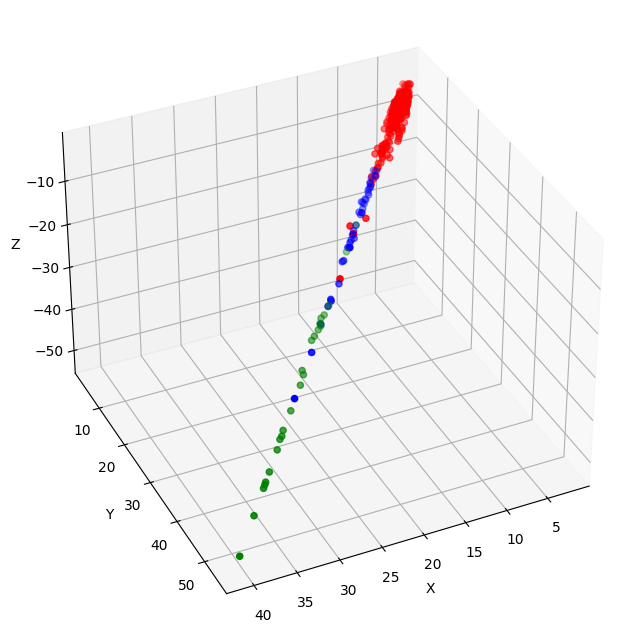

In [128]:
# 将NumPy数组转换为Python列表
h_1= embeddings.tolist()
B_1=data.y.tolist()

# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[1] for row in h_1]
z = [row[2] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=35, azim=65)

# 显示图形
plt.show()

# 构建图神经网络之前的准备工作

In [ ]:
# Install required packages.

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

2.3.1+cu121
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**检查数据集结构是否一致**

In [ ]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [ ]:
data  #注意，z此时并没有什么用

Data(x=[439, 439], edge_index=[2, 1014], y=[439], z=[439], b=[439, 441], train_mask=[439])

In [ ]:
data.edge_index.shape

torch.Size([2, 1014])

**设计一个绘图函数**

In [ ]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

**设计一个可视化嵌入**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    h = h.detach().cpu().numpy()
    scatter=plt.scatter(h[:, 0], h[:, 2], s=70, c=color, cmap="Set2")#Set2  cool


    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.colorbar(scatter)
    plt.show()

**用不同形状显示可视化嵌入**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch

def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    h = h.detach().cpu().numpy()
    color = color.detach().cpu().numpy()

    markers = ['o', '^', 's', 'p', '*', 'x', 'D', '+', 'v', '<', '>']  # 定义标记
    unique_colors = set(color)  # 获取唯一的类别

    for i, u_color in enumerate(unique_colors):
        marker = markers[i % len(markers)]  # 使用不同的标记
        mask = (color == u_color)
        #plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker, label=f'Class {u_color}')
        plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker)

    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)

    plt.legend()
    plt.show()

**开始可视化**

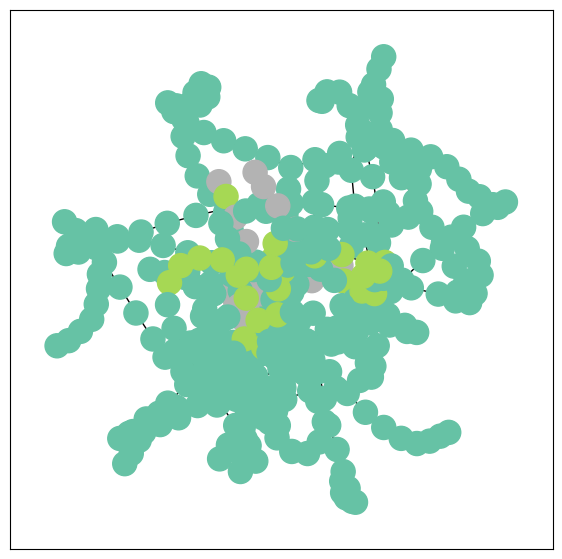

In [ ]:
#这步是必要的，请观察是否有独立的节点。没有就是正常。
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

# 构建图神经网络

In [ ]:
len(attribute_combined_1.T)#这是输入端的参数，扬州版本的代码相比福州的进步是：不再需要手动修改

441

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
#记得修改输入端的参数，必须保持一致

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(123)
        self.conv1 = GCNConv(len(attribute_combined_1.T), 128)
        self.conv2 = GCNConv(128, 32)
        self.conv3 = GCNConv(32, 6)
        self.classifier = Linear(6, 6)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(441, 128)
  (conv2): GCNConv(128, 32)
  (conv3): GCNConv(32, 6)
  (classifier): Linear(in_features=6, out_features=6, bias=True)
)


**观察嵌入**

Embedding shape: [439, 6]


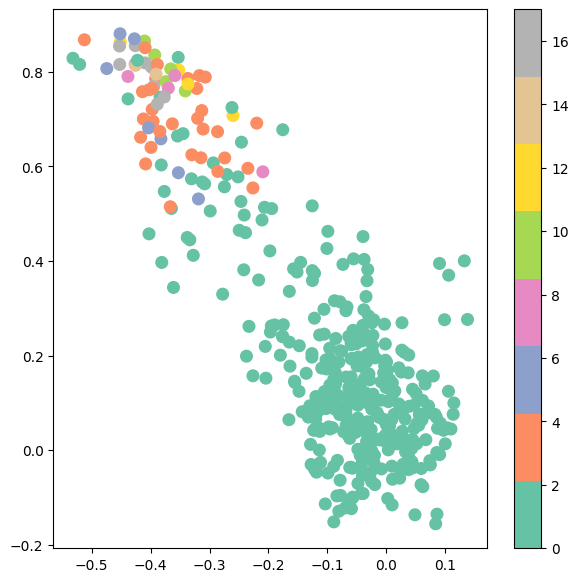

In [ ]:
model = GCN()

_, h = model(data.b.float(), data.edge_index)

print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.z)   #data.y  data.z

In [ ]:
#再次检查数据结构
print(data.y[data.train_mask])
print(data.train_mask.shape)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([439])


**开始训练模型**

<IPython.core.display.Javascript object>

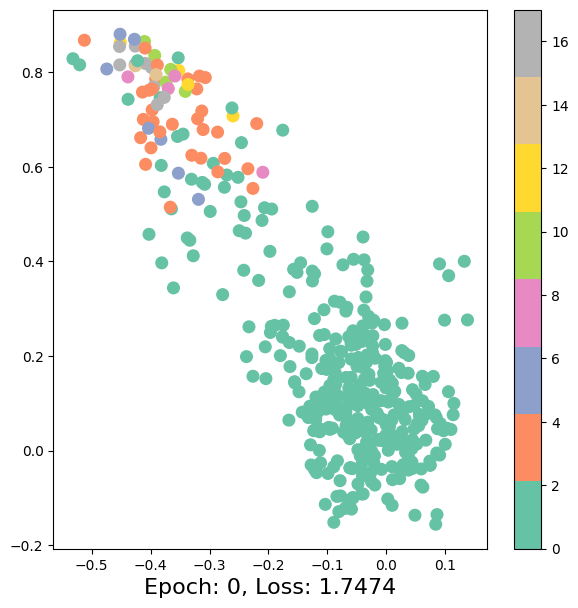

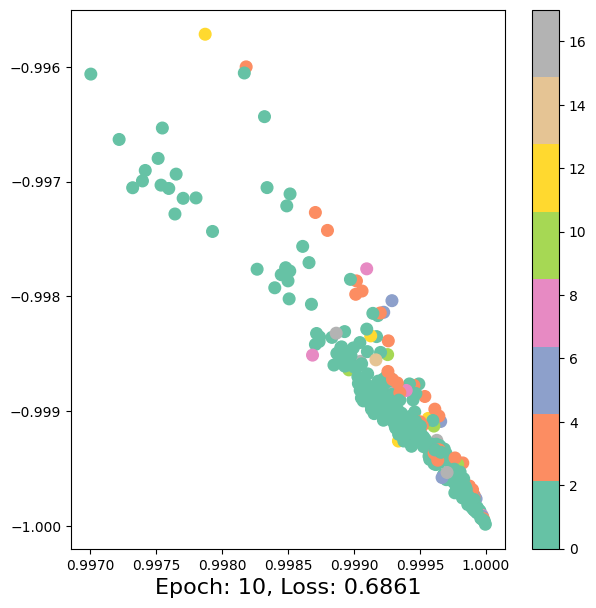

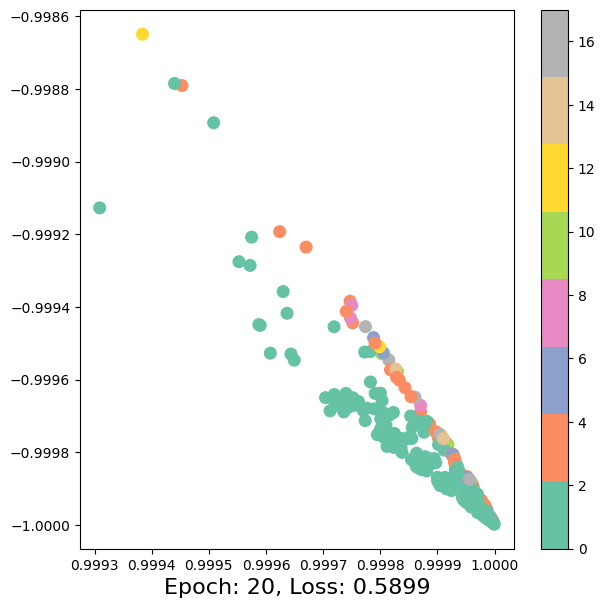

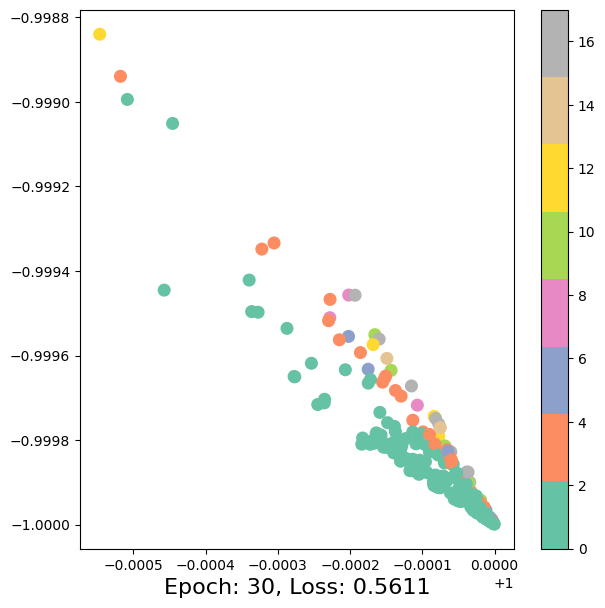

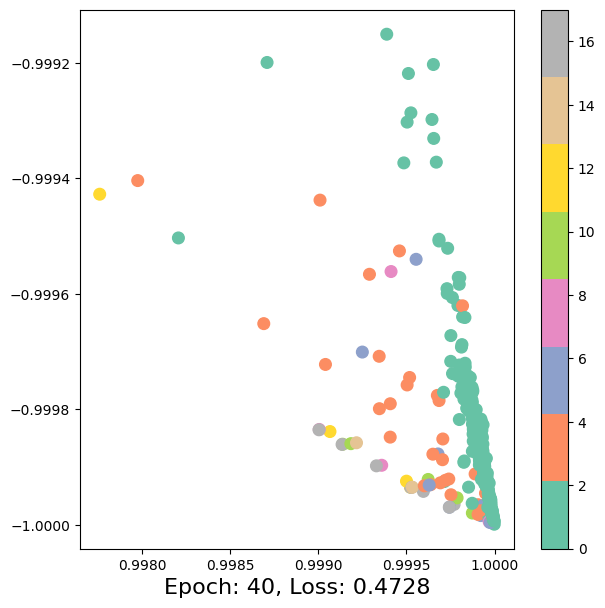

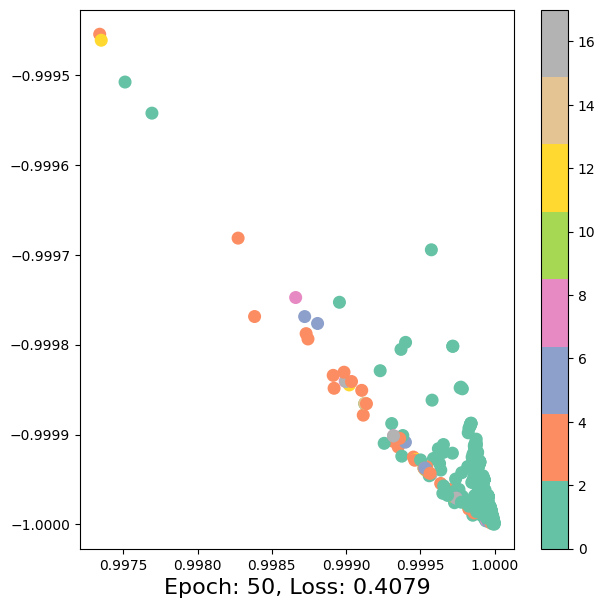

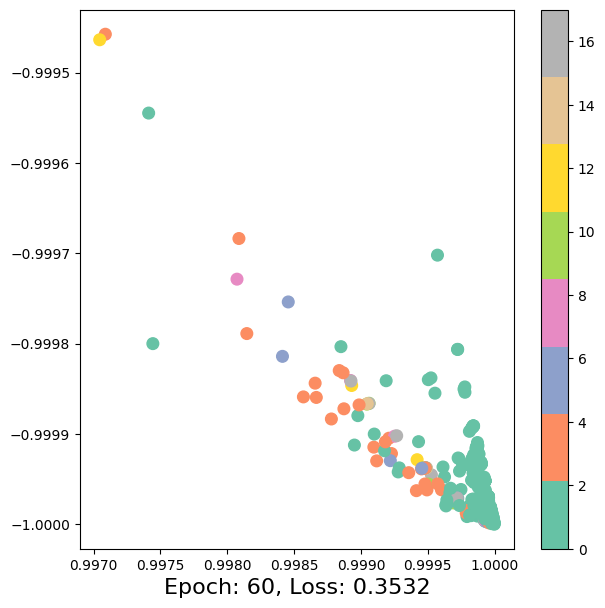

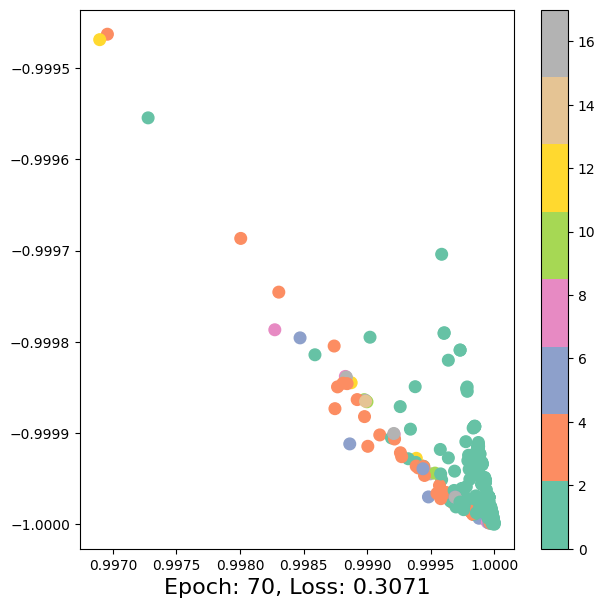

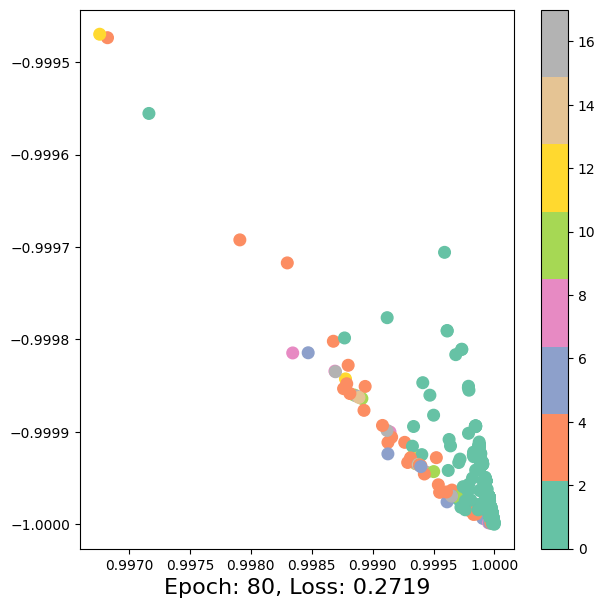

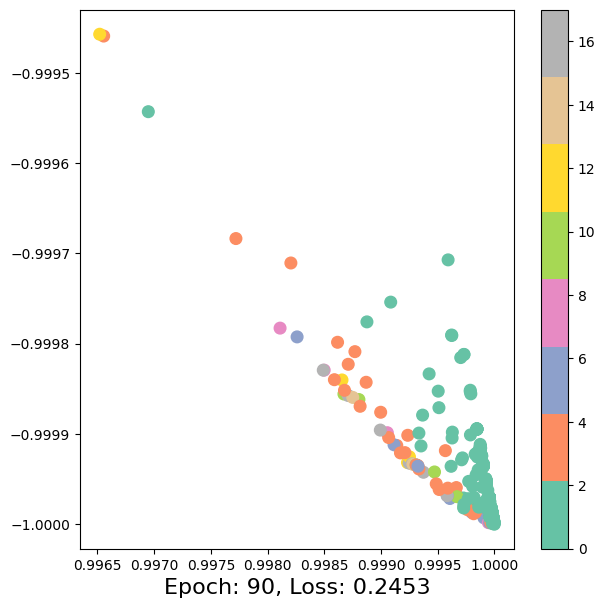

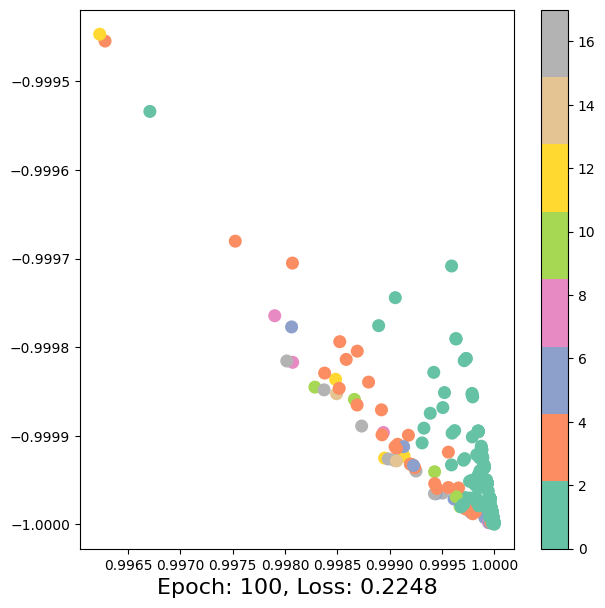

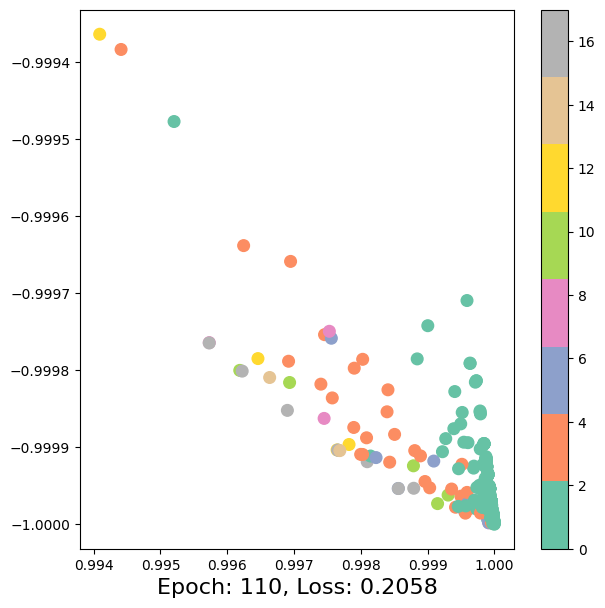

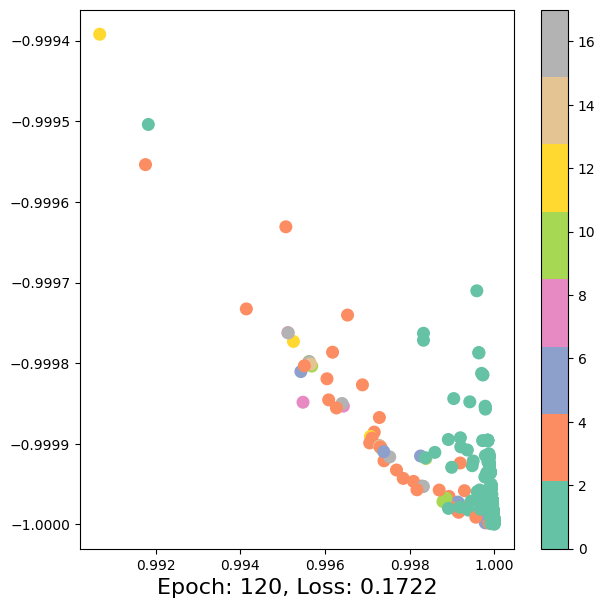

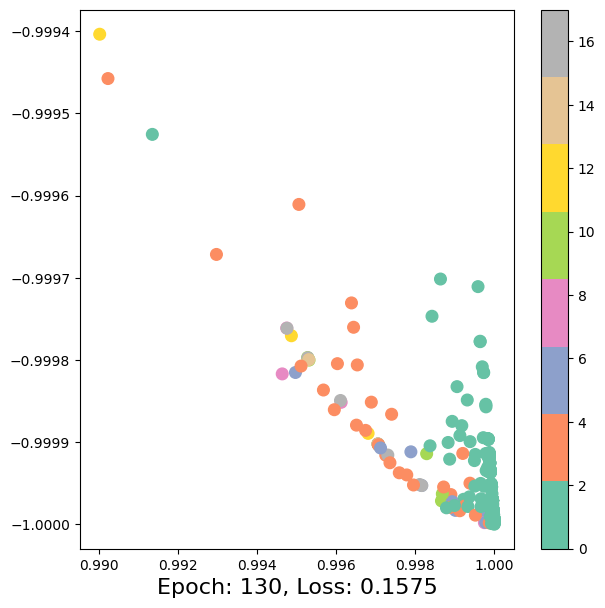

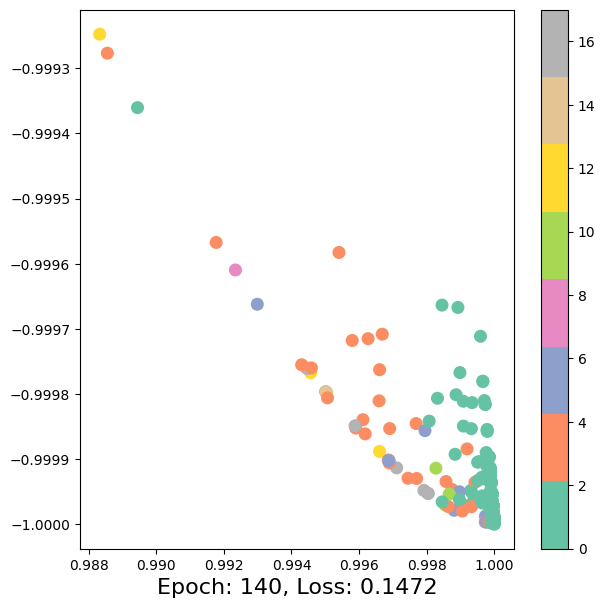

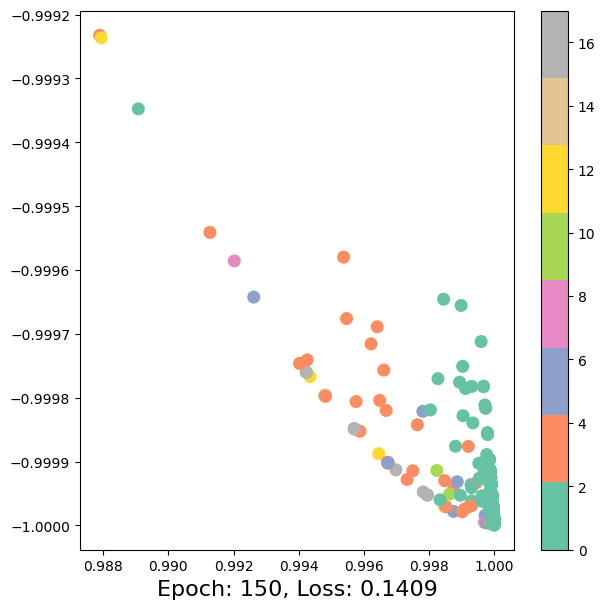

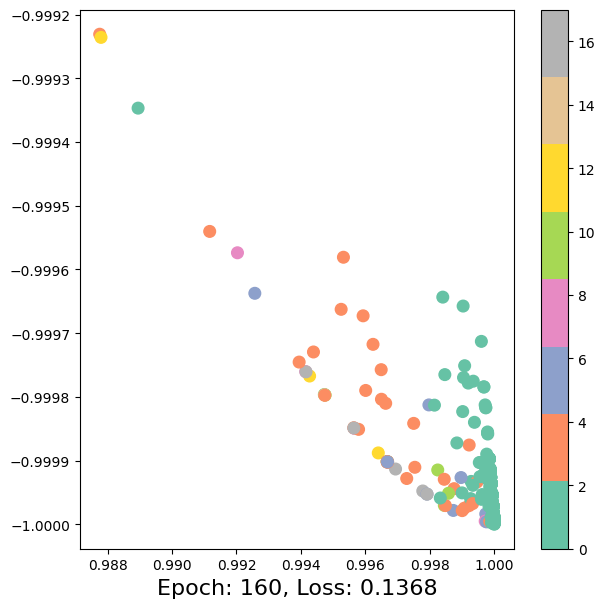

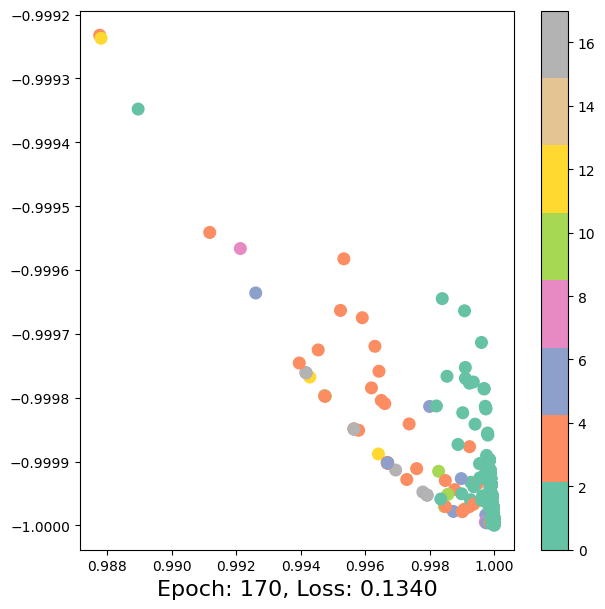

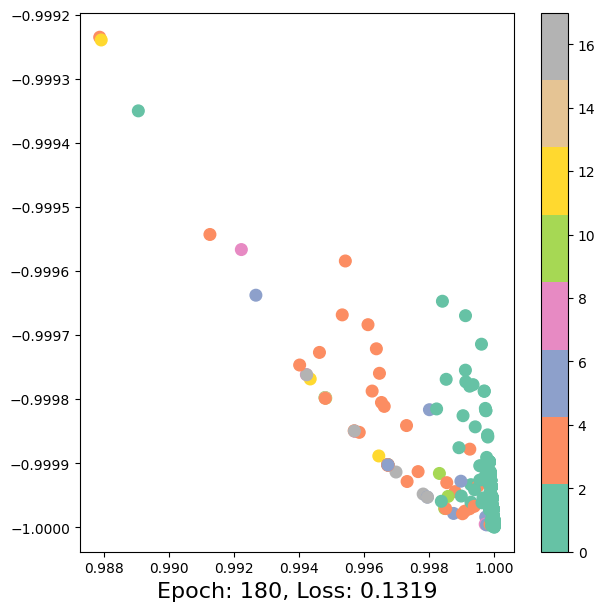

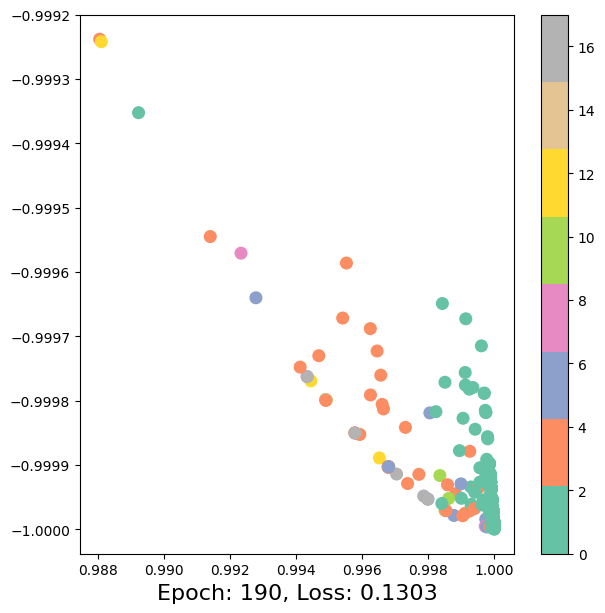

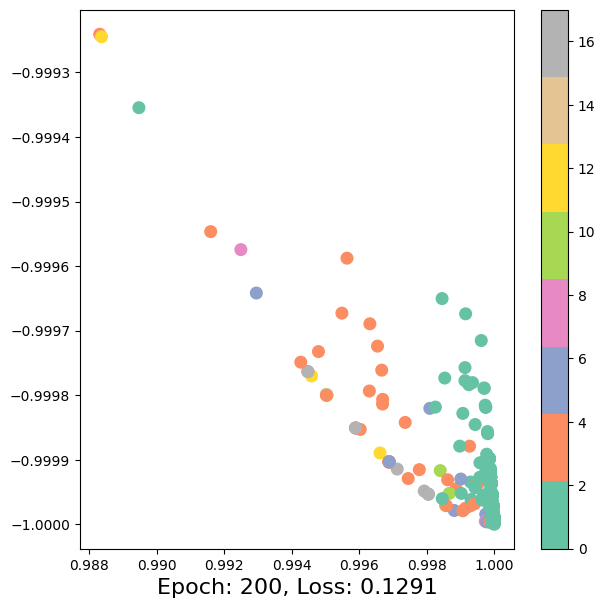

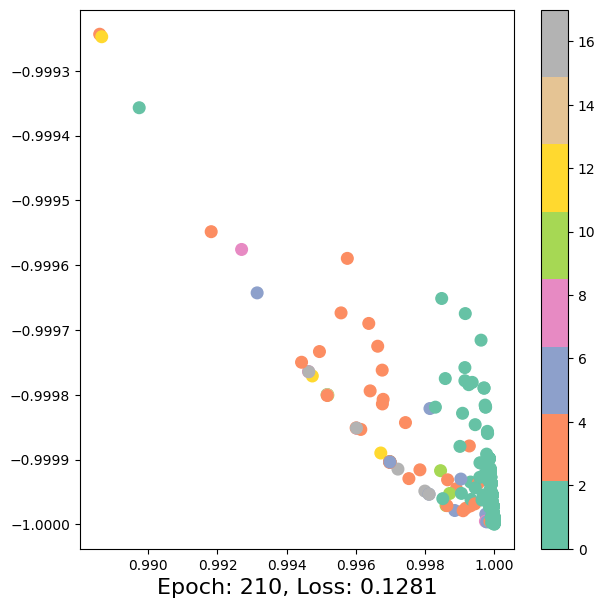

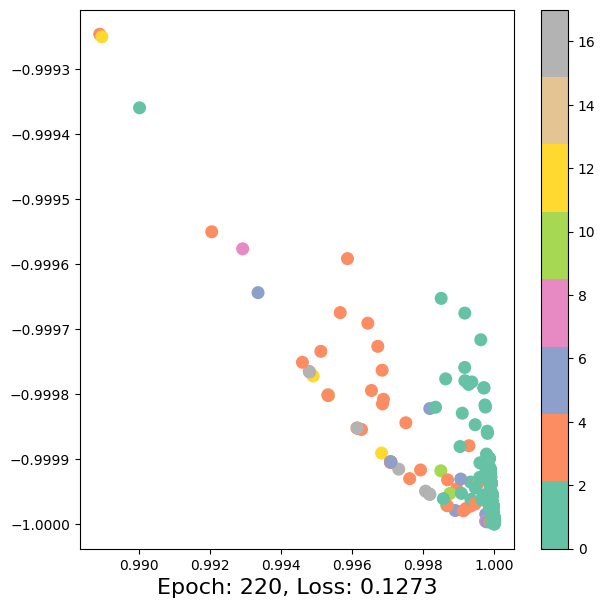

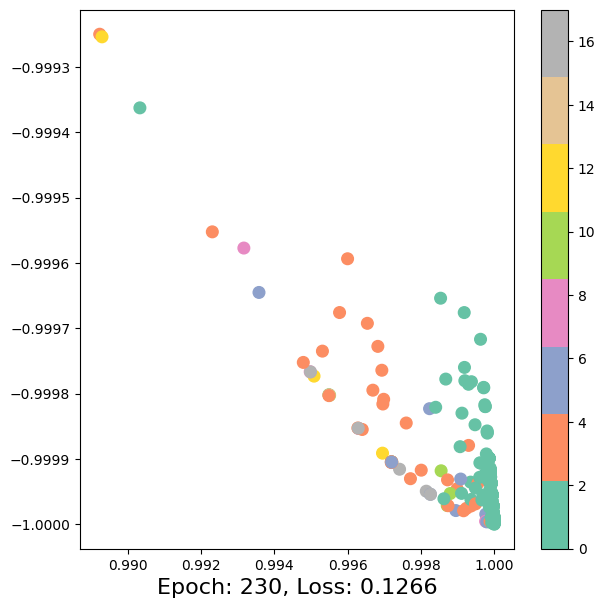

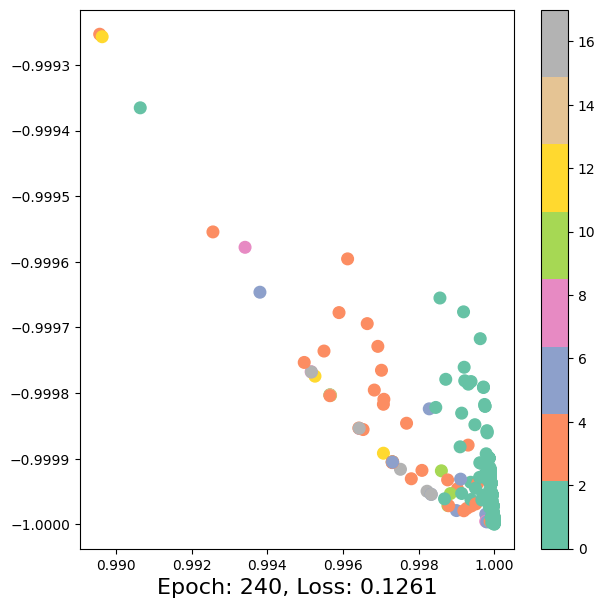

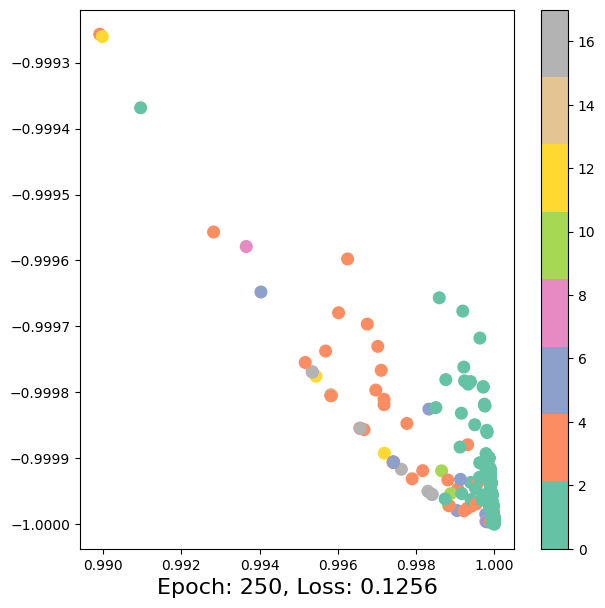

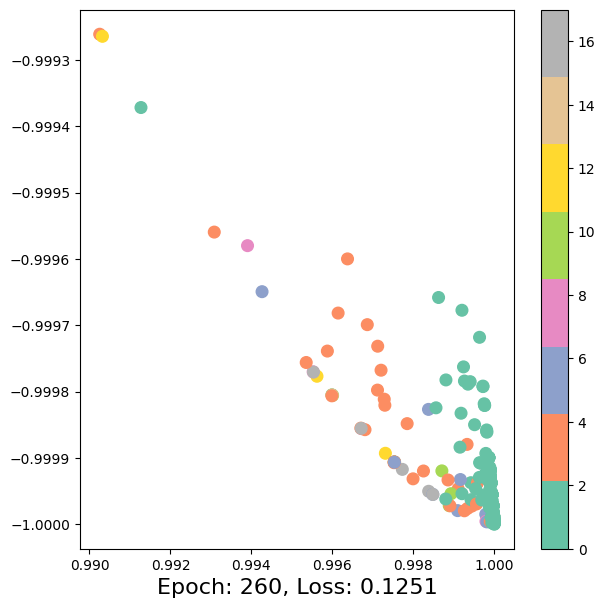

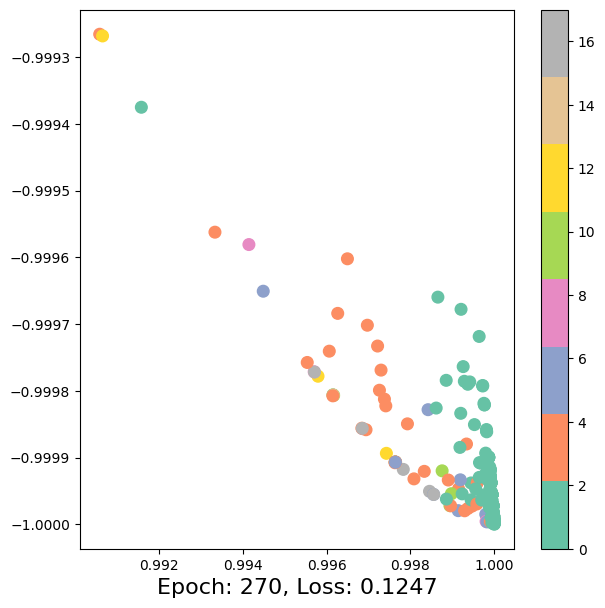

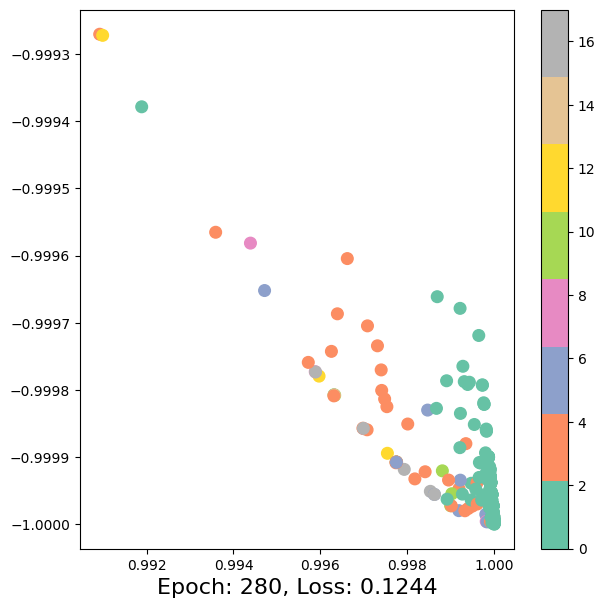

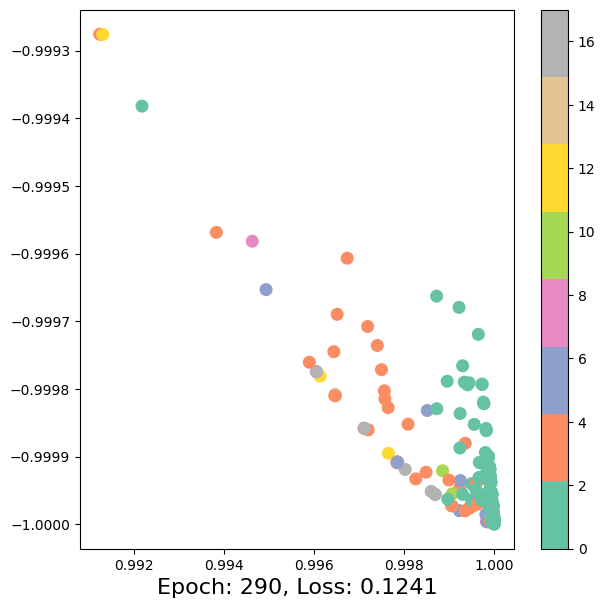

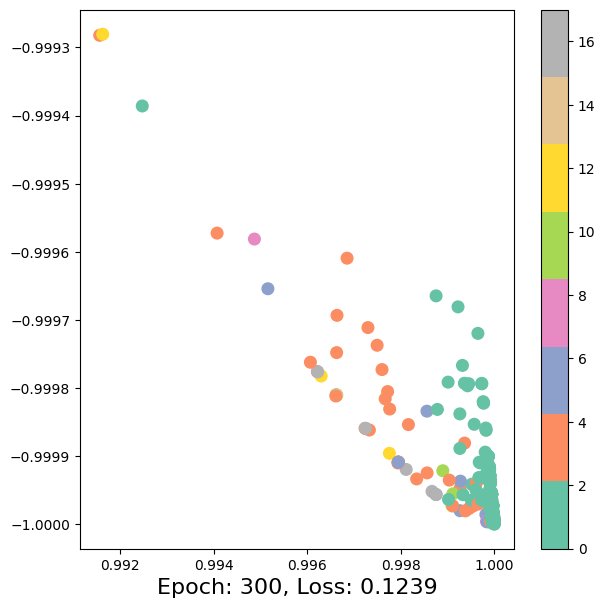

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.b.float(), data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h
loss_remember=[]
for epoch in range(301):
    loss, h = train(data)
    loss_remember.append(loss)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.z, epoch=epoch, loss=loss)
        time.sleep(0.1)

Text(0, 0.5, 'Loss')

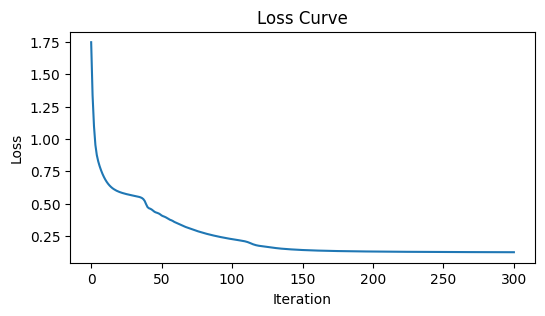

In [ ]:
for i in range(len(loss_remember)):

    loss_remember[i]=loss_remember[i].detach().numpy()

import matplotlib.pyplot as plt
import numpy as np
losses=loss_remember
plt.figure(figsize=(6,3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [ ]:
print(h)
print(h.shape)

tensor([[-1.0000, -1.0000, -0.9998,  1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000, -0.9999,  1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000, -1.0000,  1.0000,  1.0000,  1.0000],
        ...,
        [-1.0000, -1.0000, -0.9994,  1.0000,  0.9932,  1.0000],
        [-1.0000, -1.0000, -0.9998,  1.0000,  1.0000,  1.0000],
        [-1.0000, -1.0000, -0.9999,  1.0000,  1.0000,  1.0000]],
       grad_fn=<TanhBackward0>)
torch.Size([439, 6])


# 使用一些手段获取核心区的位置信息

In [ ]:
#节点和数字间的映射关系(翻转)
print(reversed_dict)

{'西北部公交枢纽站': '0', '公交西路修理公司(普吉路)': '1', '普吉路中段': '2', '王家桥(普吉路)': '3', '观音寺社区': '4', '交通学校': '5', '普吉路南口': '6', '金鼎园': '7', '虹山新村': '8', '阳光果香小区（学府路）': '9', '冶金学校': '10', '苏家塘': '11', '理工大学西门(建设路)': '12', '地台寺': '13', '建设路': '14', '府甬道': '15', '云南大学(翠湖北路)': '16', '青云街': '17', '华山西路': '18', '华山西路地铁站D口': '19', '财盛巷口(人民中路)': '20', '南太桥(青年路)': '21', '得胜桥(青年路)': '22', '塘子巷(拓东路)': '23', '拓东路中段': '24', '市博物馆': '25', '岔街(拓东路)': '26', '东站(环城南路)': '27', '昆明站(永平路)': '28', '昆明站(站前路)': '29', '永安路口(北京路)': '30', '环城南路口(北京路)': '31', '和平村(北京路)': '32', '塘子巷(北京路)': '33', '东风广场(北京路)': '34', '交三桥(人民东路)': '35', '文庙(人民中路)': '36', '富春街口(人民中路)': '37', '百汇商场': '38', '西站': '39', '虹山南路口(滇缅大道)': '40', '麻园(滇缅大道)': '41', '黄土坡': '42', '颐园小区(白云路)': '43', '白云路口(北京路)': '44', '凤凰新村': '45', '火车北站(北京路)': '46', '穿心鼓楼(北京路)': '47', '凤凰村': '48', '金马坊': '49', '靖国路口': '50', '弥勒寺(西昌路)': '51', '工人新村(西昌路)': '52', '西岳庙(海埂路)': '53', '豆腐营(海埂路)': '54', '洒金巷口(海埂路)': '55', '绿荫大道路口': '56', '日新路口(润城第二大道)': '57', '前卫营(前兴路)': '58', '前兴路公交枢纽站

In [ ]:
H=[]
for  i in range(len(attribute_label)):
  if h[i][4]>0.75  :#and h[i][1]>=-1
    H.append(i)
  else:
     pass

H=np.array(H)

In [ ]:
print(H.shape)
H

(66,)


array([ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  33,  34,  35,
        36,  37,  38,  49,  50,  63,  64,  77, 107, 131, 132, 133, 154,
       155, 156, 174, 175, 189, 190, 191, 207, 223, 240, 241, 251, 252,
       286, 315, 317, 319, 320, 321, 365, 366, 367, 368, 381, 382, 383,
       384, 385, 393, 394, 395, 402, 403, 404, 405, 420, 421, 422, 423,
       424])

In [ ]:
new_list = []
for key in H:
  new_list.append(mapping_dict[str(key)])
new_list

['地台寺',
 '建设路',
 '府甬道',
 '云南大学(翠湖北路)',
 '青云街',
 '华山西路',
 '华山西路地铁站D口',
 '财盛巷口(人民中路)',
 '南太桥(青年路)',
 '得胜桥(青年路)',
 '塘子巷(北京路)',
 '东风广场(北京路)',
 '交三桥(人民东路)',
 '文庙(人民中路)',
 '富春街口(人民中路)',
 '百汇商场',
 '金马坊',
 '靖国路口',
 '圆通山',
 '青年路',
 '艺术剧院',
 '潘家湾',
 '南屏街西口',
 '小西门',
 '建设路2',
 '东寺街',
 '西寺塔',
 '东寺街南口',
 '翠湖东门',
 '圆通街',
 '云南大学(青云街)',
 '翠湖北路',
 '科技馆',
 '建设路1',
 '巡津街',
 '小花园(青年路)',
 '青年路2',
 '市总工会',
 '书林街南口',
 '青年路1',
 '百汇商场1',
 '翠湖南路',
 '师范大学',
 '一二一大街(莲花池)',
 '22路临时站',
 '端仕街口(庆云街)',
 '威远街口(护国路)',
 '威远街',
 '正义路步行街',
 '正义路',
 '胜利广场',
 '如安街口(五一路)',
 '龙井街口(五一路)',
 '国防路',
 '昆师路',
 '师范大学(西南联大博物馆)',
 '一二一大街',
 '东寺街(玉带河)(桥)',
 '柿花桥',
 '西寺巷(桥)',
 '金碧路天桥',
 '鼓楼路(桥)',
 '圆通大桥',
 '人民中路(桥)',
 '东风东路(桥)',
 '宝善街(桥)']

**寻找new_list之间的链接关系(获取节点的邻居)**

In [ ]:
#重新构建图
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    attr4 = row['800M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3
        G.nodes[node]['800M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

In [ ]:

result = []
for m in new_list:
    neighbors = G.neighbors(m) # 获得节点m的所有邻居
    common_neighbors = [n for n in neighbors if n in new_list] # 保留那些在new_list中的邻居
    result.append([m + ":" + ", ".join(common_neighbors)])

result

[['地台寺:建设路, 建设路2'],
 ['建设路:地台寺, 府甬道, 百汇商场, 百汇商场1'],
 ['府甬道:建设路, 云南大学(翠湖北路), 云南大学(青云街), 建设路1'],
 ['云南大学(翠湖北路):府甬道, 青云街'],
 ['青云街:云南大学(翠湖北路), 华山西路'],
 ['华山西路:青云街, 华山西路地铁站D口'],
 ['华山西路地铁站D口:华山西路, 财盛巷口(人民中路)'],
 ['财盛巷口(人民中路):华山西路地铁站D口, 南太桥(青年路), 交三桥(人民东路), 文庙(人民中路)'],
 ['南太桥(青年路):财盛巷口(人民中路), 得胜桥(青年路), 交三桥(人民东路), 青年路, 小花园(青年路)'],
 ['得胜桥(青年路):南太桥(青年路), 金马坊, 巡津街'],
 ['塘子巷(北京路):东风广场(北京路)'],
 ['东风广场(北京路):塘子巷(北京路), 交三桥(人民东路)'],
 ['交三桥(人民东路):东风广场(北京路), 财盛巷口(人民中路), 南太桥(青年路)'],
 ['文庙(人民中路):财盛巷口(人民中路), 富春街口(人民中路), 正义路步行街'],
 ['富春街口(人民中路):文庙(人民中路), 百汇商场'],
 ['百汇商场:富春街口(人民中路), 建设路, 小西门, 建设路2'],
 ['金马坊:得胜桥(青年路), 靖国路口, 巡津街'],
 ['靖国路口:金马坊, 金碧路天桥, 国防路'],
 ['圆通山:青年路, 圆通街, 青年路1'],
 ['青年路:圆通山, 南太桥(青年路)'],
 ['艺术剧院:南屏街西口, 小西门, 国防路'],
 ['潘家湾:师范大学'],
 ['南屏街西口:艺术剧院'],
 ['小西门:艺术剧院, 百汇商场'],
 ['建设路2:百汇商场, 地台寺, 昆师路, 师范大学(西南联大博物馆)'],
 ['东寺街:西寺塔'],
 ['西寺塔:东寺街, 东寺街南口'],
 ['东寺街南口:西寺塔, 市总工会, 东寺街(玉带河)(桥)'],
 ['翠湖东门:圆通街, 翠湖南路'],
 ['圆通街:翠湖东门, 圆通山, 云南大学(青云街)'],
 ['云南大学(青云街):圆通街, 翠湖北路, 府甬道'],
 ['翠湖北路:云南大学(青云街), 科技馆'],
 ['科技馆:翠

**查询方式**

In [ ]:
target = "书林街"

matching_sublists = [sublist for sublist in result if target in sublist[0]]

matching_sublists

[['市总工会:东寺街南口, 书林街南口, 巡津街'], ['书林街南口:市总工会']]

**三维可视化**

In [ ]:
h.shape
B=data.y
B.shape
# 将NumPy数组转换为Python列表
h_1= h.tolist()
B_1=B.tolist()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

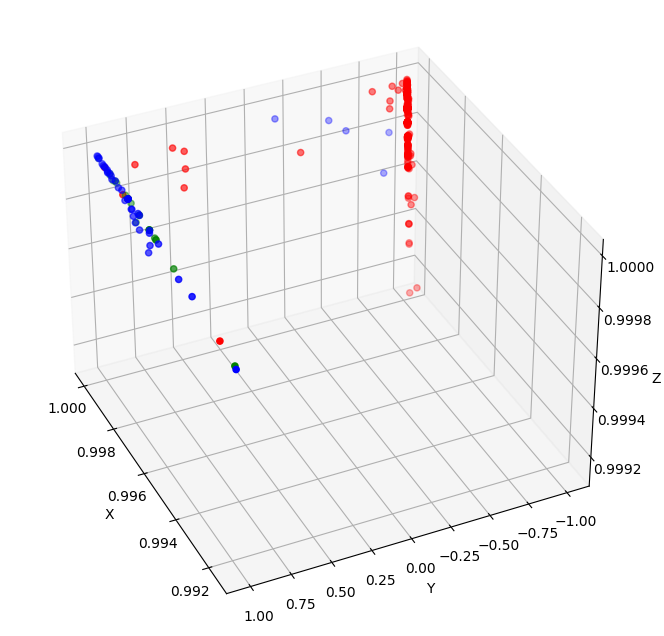

In [ ]:
# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[4] for row in h_1]
z = [row[3] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=35, azim=155)

# 显示图形
plt.show()